Chargement et aperçu du jeu de données

In [59]:
# 1.1 - Import des bibliothèques de base
import pandas as pd

# 1.2 - Chargement du dataset
df = pd.read_csv("diabetes.csv")  # Mets le chemin complet si besoin

# 1.3 - Aperçu des premières lignes
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Nombre de lignes : 768
Nombre de colonnes : 9

Types de variables :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Valeurs nulles par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques descriptives :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


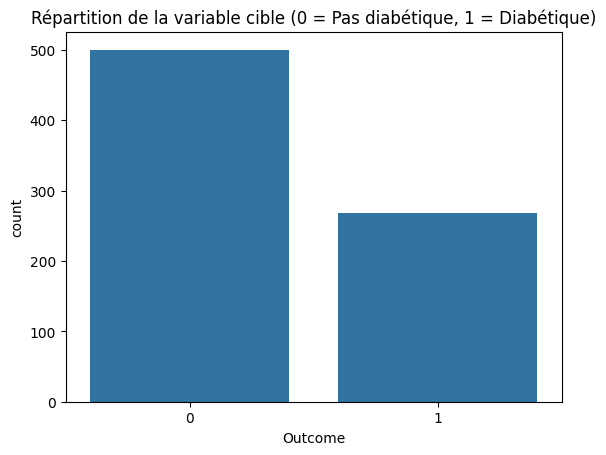

Glucose - Valeurs = 0 : 5
BloodPressure - Valeurs = 0 : 35
SkinThickness - Valeurs = 0 : 227
Insulin - Valeurs = 0 : 374
BMI - Valeurs = 0 : 11


In [60]:
# 2.1 - Dimensions du dataset
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# 2.2 - Types de données
print("\nTypes de variables :")
print(df.dtypes)

# 2.3 - Valeurs nulles (il n’y en a pas officiellement, mais on verra les zéros suspects plus tard)
print("\nValeurs nulles par colonne :")
print(df.isnull().sum())

# 2.4 - Aperçu statistique global
print("\nStatistiques descriptives :")
display(df.describe())

# 2.5 - Distribution de la variable cible
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=df)
plt.title("Répartition de la variable cible (0 = Pas diabétique, 1 = Diabétique)")
plt.show()

# 2.6 - Vérif rapide : y a-t-il des 0 suspects dans certaines colonnes ?
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"{col} - Valeurs = 0 : {zero_count}")


On constate qu'il n'y a aucunes valeurs manquantes.
La cible à prédire est la colonne outcome et la répartition n'est pas trop déséquilibré.
Certaines valeurs à zéro sont irréalistes : glycémie et pression à zéro sont incompatibles avec la vie. Une épaisseur de peau ou un BMI à zéro est biologiquement impossible. Un taux d’insuline à zéro indique souvent une donnée manquante.
On va donc les remplacer par NaN, puis de les imputer par la médiane avant d'entraîner un modèle fiable.

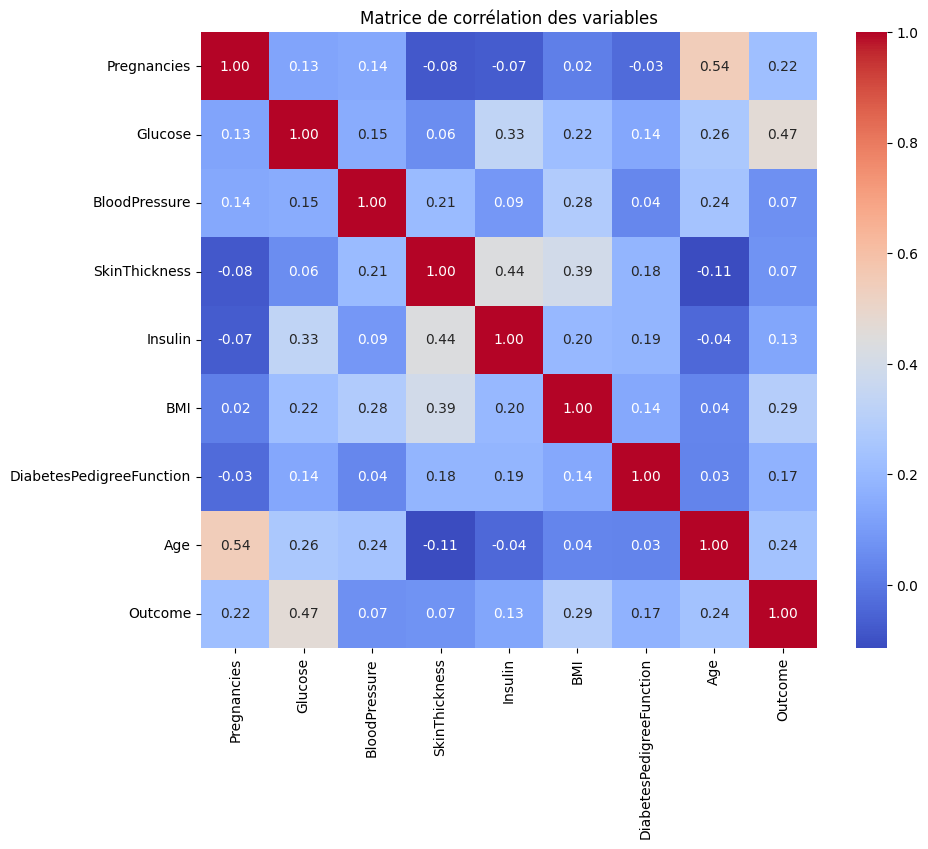

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables")
plt.show()


On constate que les colonnes ne sont pas complétement corréler donc nous avons decidé de garder toute les colonnes

In [62]:
from sklearn.model_selection import train_test_split

#Séparer features et target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

#Séparation train vs (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

#Séparation val vs test (sur le 20% restant → 50/50 → 10% chacun)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

In [63]:
import numpy as np

# Colonnes avec des zéros aberrants
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Remplacement des 0 par NaN (dans X_train uniquement, puis idem sur val/test)
def replace_zeros_with_nan(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].replace(0, np.nan)
    return df

X_train = replace_zeros_with_nan(X_train, cols_with_zeros)
X_val = replace_zeros_with_nan(X_val, cols_with_zeros)
X_test = replace_zeros_with_nan(X_test, cols_with_zeros)

# Imputation par la médiane (calculée sur X_train pour éviter fuite)
medians = X_train.median()

X_train = X_train.fillna(medians)
X_val = X_val.fillna(medians)
X_test = X_test.fillna(medians)

# Vérification rapide
print("Valeurs manquantes après imputation :")
print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())


Valeurs manquantes après imputation :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


On remplace les zéros aberrants par NaN

On calcule la médiane uniquement sur le train

On remplace les NaN par cette médiane dans train, val, test (pas de fuite)

In [64]:
# Import de ta classe FeatureEngineering
from Utils import FeatureEngineering  # adapte le chemin si besoin

# Instanciation
fe = FeatureEngineering()


Maintenant on met en place le pipeline de sélection de modèle grace à notre classe Featuring_Engineering et GridSearch afin de sélectionner les meilleurs hyperparamètres

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# --- Pipeline RF ---
pipeline_rf = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Grille de paramètres RF
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Meilleurs params RF :", grid_rf.best_params_)
y_val_pred_rf = grid_rf.predict(X_val)
print("Accuracy validation RF :", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs params RF : {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy validation RF : 0.7922077922077922
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        52
           1       0.66      0.76      0.70        25

    accuracy                           0.79        77
   macro avg       0.77      0.78      0.77        77
weighted avg       0.80      0.79      0.80        77


In [66]:
from xgboost import XGBClassifier


# --- Pipeline XGBoost ---
pipeline_xgb = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Grille de paramètres XGB
param_grid_xgb = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
}

grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Meilleurs params XGB :", grid_xgb.best_params_)
y_val_pred_xgb = grid_xgb.predict(X_val)
print("Accuracy validation XGB :", accuracy_score(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs params XGB : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Accuracy validation XGB : 0.7532467532467533
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        52
           1       0.62      0.64      0.63        25

    accuracy                           0.75        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.76      0.75      0.75        77


Sélection et entrainement du meilleur modèle

In [76]:
import shap
import matplotlib.pyplot as plt

# Charger l'explainer TreeSHAP adapté aux arbres (RF et XGB)
explainer_rf = shap.TreeExplainer(grid_rf.best_estimator_.named_steps['classifier'])
explainer_xgb = shap.TreeExplainer(grid_xgb.best_estimator_.named_steps['classifier'])


In [79]:
# Transformer les données test avec le pipeline (juste feature_engineering)
X_test_fe = grid_rf.best_estimator_.named_steps['feature_engineering'].transform(X_test)

# Calcul SHAP
shap_values_rf = explainer_rf.shap_values(X_test_fe)
shap_values_xgb = explainer_xgb.shap_values(X_test_fe)


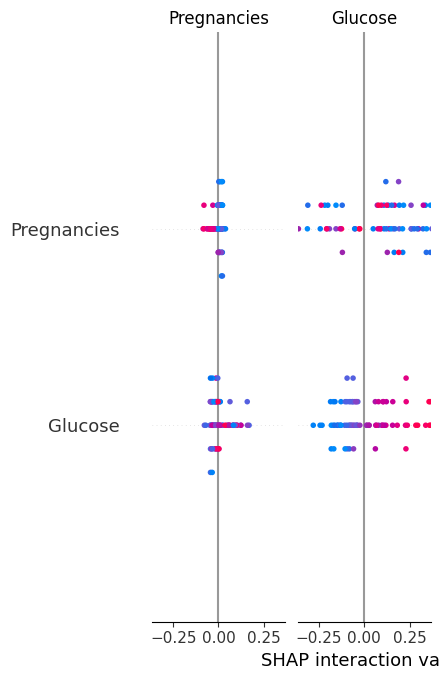

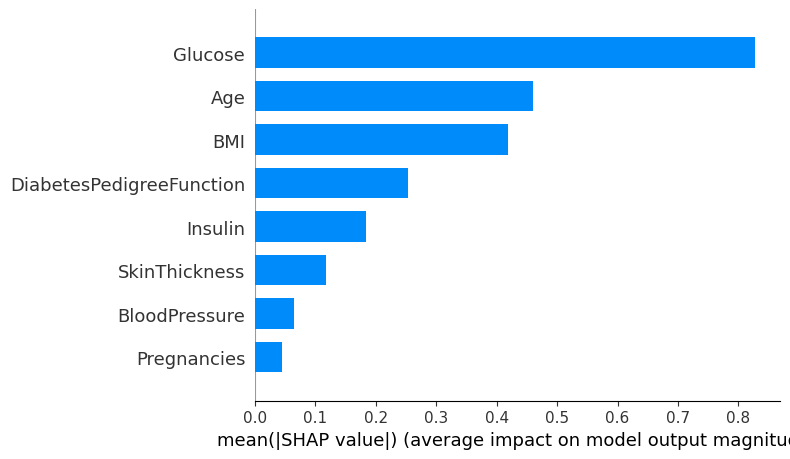

In [80]:
# Random Forest
shap.summary_plot(shap_values_rf, X_test_fe, plot_type="bar", show=True)

# XGBoost
shap.summary_plot(shap_values_xgb, X_test_fe, plot_type="bar", show=True)


In [111]:
# shap_values_rf[i] est (8,2)
# On prend la colonne 1 (classe diabète)
shap_vals_instance = shap_values_rf[0][:, 1]

# Expected value pour la classe 1 (à récupérer aussi)
expected_value_class1 = explainer_rf.expected_value[1]

# Affichage force plot
shap.force_plot(
    expected_value_class1,
    shap_vals_instance,
    X_test_fe.iloc[i]
)


Transformer tes valeurs SHAP pour ne garder que la classe positive (diabète = 1)

In [113]:
import numpy as np

# Extraire les valeurs SHAP pour la classe 1 (diabète) uniquement
shap_values_class1 = np.array([shap_values_rf[i][:, 1] for i in range(len(shap_values_rf))])

print("Shape des shap_values pour la classe 1 :", shap_values_class1.shape)  # (77, 8)


Shape des shap_values pour la classe 1 : (77, 8)


In [120]:
i = 1  # index de l'instance

shap.force_plot(
    explainer_xgb.expected_value,  # expected value scalaire
    shap_values_xgb[i],            # vecteur SHAP (attention au format, voir ci-dessous)
    X_test_fe.iloc[i]
)


Dependence plot pour Random Forest

(77, 8)


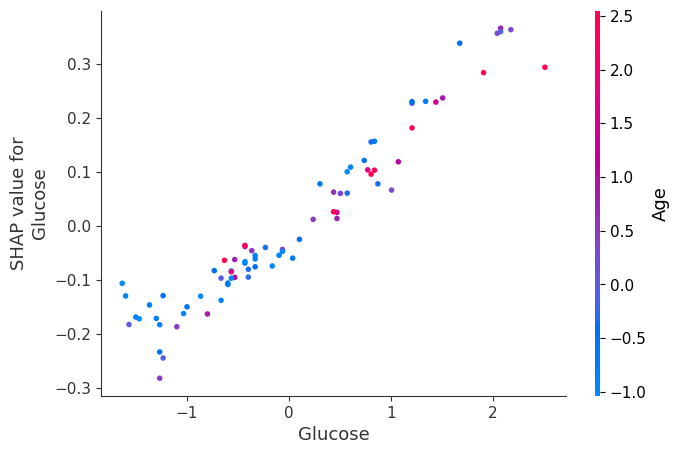

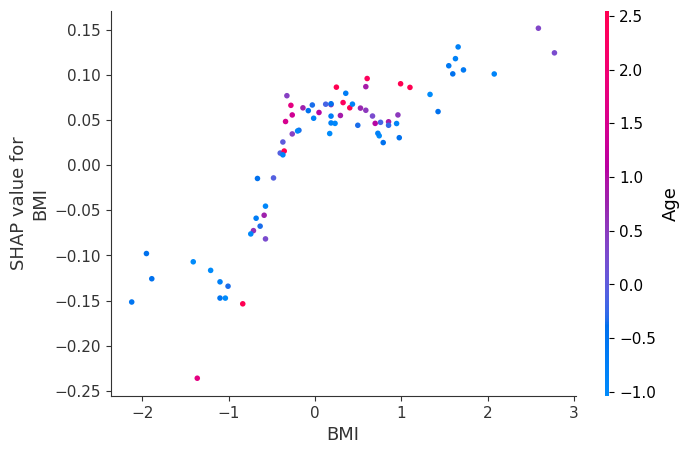

In [136]:
# Sélection de la classe 1 pour shap values
shap_vals_rf_class1 = shap_values_rf[:, :, 1]

# Vérifie la forme (doit être (n_samples, n_features))
print(shap_vals_rf_class1.shape)  # (77, 8)

# Affiche un dependence_plot pour la feature "Glucose"
shap.dependence_plot("Glucose", shap_vals_rf_class1, X_test_fe)

# Exemple pour "BMI"
shap.dependence_plot("BMI", shap_vals_rf_class1, X_test_fe)


shap_values_xgb shape : (77, 8)
X_test_fe columns : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


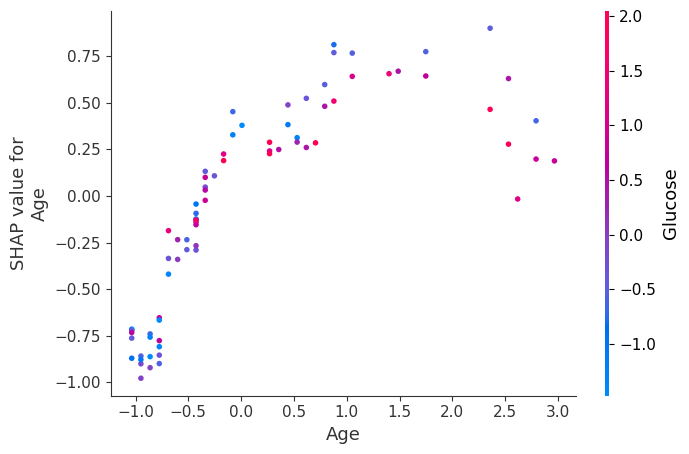

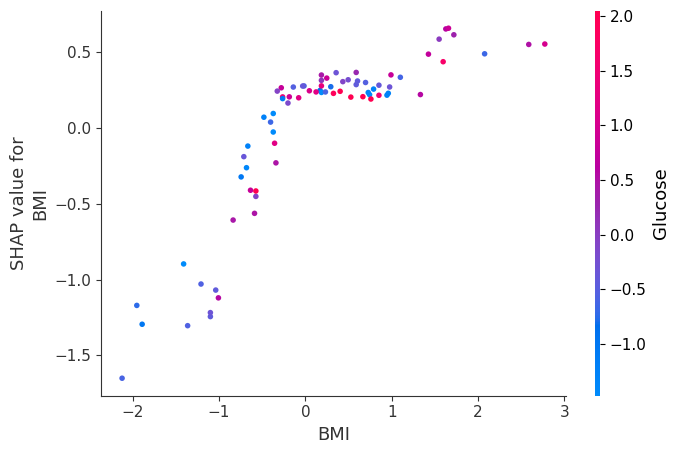

In [145]:
print("shap_values_xgb shape :", shap_values_xgb.shape)
print("X_test_fe columns :", X_test_fe.columns)

# Supposons que Glucose est bien une colonne
shap.dependence_plot("Age", shap_values_xgb, X_test_fe)

# Supposons que Glucose est bien une colonne
shap.dependence_plot("BMI", shap_values_xgb, X_test_fe)

In [137]:
for grp, subset in X_test_fe.groupby(X_test['Age'] < 30):
    y_true_grp = y_test[subset.index]
    y_pred_grp = grid_rf.predict(subset)
    print(f"Groupe Age <30 = {grp}")
    print(classification_report(y_true_grp, y_pred_grp))


Groupe Age <30 = False
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        17
           1       0.00      0.00      0.00        19

    accuracy                           0.47        36
   macro avg       0.24      0.50      0.32        36
weighted avg       0.22      0.47      0.30        36

Groupe Age <30 = True
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        30
           1       0.00      0.00      0.00        11

    accuracy                           0.73        41
   macro avg       0.37      0.50      0.42        41
weighted avg       0.54      0.73      0.62        41


C:\Users\User\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\venv\lib\site-packages\sklearn\metrics\_clas